In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import RNA

# Data Loading

Eterna v2

In [2]:
# Downloaded from https://github.com/eternagame/eterna100-benchmarking/blob/master/eterna100_vienna2.txt
eterna_benchmark = pd.read_csv('../benchmark/eterna100_vienna2.csv', sep='\t')
eterna_benchmark

,Puzzle #,Puzzle Name,Eterna ID,Author,Secondary Structure,Sample Solution
0,1,Simple Hairpin,6141752,Sneh,(((((......))))),CCGCCGAAAAAGGCGG
1,2,Arabidopsis Thaliana 6 RNA - Difficulty Level 0,6141758,Sneh,(((((((....(((...........)))((((((((..((((((((...,ACAGGUCAAAAGCGGAAAAAAAAAACGCCCGACCGGAUCGGGCCGG...
2,3,Prion Pseudoknot - Difficulty Level 0,6141785,Sneh,((((((.((((....))))))).)))..........,CGGGACGCCCGGAAACGGGGUCACCGAAAAAAAAAA
3,4,Human Integrated Adenovirus - Difficulty Level 0,6145454,Sneh,((((((((((((((.((((((...........((((((((((((.....,GGUCACCGGGGGGGGGGGUAAAAAAAAAAAAUAGCGGGGCCGCAGA...
4,5,The Gammaretrovirus Signal - Difficulty Level 0,6145456,Sneh,..(.(..((((((....))))))..).)......((((..(((.((...,UACGCUGGCCCCGGAAACGGGGCUGGGGAAAGAAUCGGAUCCCGCC...
...,...,...,...,...,...,...
95,96,Cesspool,9474730,hoglahoo/JR,((..(..((....))..(((.(..(.(((...)))..)..)..)))...,GCAACAAGCAAAAGCAACGCAGAACAGGCAAAGCCAGGGGCGGGCG...
96,97,Hoglafractal,9480251,hoglahoo/Jieux,(.(((..(((((....(((((......))))))))))((((...((...,GAGCCAGCUAGGGAAUCUCUCGAAAAAGAGAGCCUAGGCUCAAAGC...
97,98,Bullseye,8935413,hoglahoo,...(((((((...))))..((((...))))..((((...)))))))...,GAAGCCGACCAUAGGUCGACGCCAGAGGCGAAUGGCAAAGCCAGGC...
98,99,Shooting Star,9597797,Brourd,(((((((((((((((((...(.(..((.(((.(((.((....).))...,CCCACCCUGGGGCUGGUUCUGUGUUCCUCCGUCCGUCCUUUUGUGU...


NEMO results

In [3]:
# Downloaded from https://github.com/eternagame/eterna100-benchmarking/blob/master/nemo/nemo_v2_solutions.txt

dfNemo = pd.read_csv('../results/eterna_results/nemo_v2_solutions.txt', sep='\t')
dfNemov2 = dfNemo[dfNemo['Vienna_version']==2]
dfNemov2

,Unnamed: 0,Eterna100_version,MFE_seq_vienna1,MFE_seq_vienna2,Seq_degeneracy,Vienna_version,len_seq,n_bps,n_unique_seqs,puzzle_ind,puzzle_name,target_structure,total_seqs
1,0,2.0,CCGCCGAAAAAGGCGG,CCGCCGAAAAAGGCGG,119.0,2.0,16.0,5.0,7.0,1.0,Simple Hairpin,(((((......))))),1000.0
3,0,2.0,GGCGCCGAAAAUGCGAAAAAAAAAAGCACGGAGUCCUGAAGGGCAA...,GGCGCCGAAAAUGCGAAAAAAAAAAGCACGGAGUCCUGAAGGGCAA...,2.0,2.0,116.0,42.0,123.0,2.0,Arabidopsis Thaliana 6 RNA - Difficulty Level 0,(((((((....(((...........)))((((((((..((((((((...,1000.0
5,0,2.0,CGGGACGCCCGGAAACGGGGUCACCGAAAAAAAAAA,CGGGACGCCCGGAAACGGGGUCACCGAAAAAAAAAA,108.0,2.0,36.0,10.0,8.0,3.0,Prion Pseudoknot - Difficulty Level 0,((((((.((((....))))))).)))..........,1000.0
7,0,2.0,GGGCGCGUAGUCUUGCCGGGGAAAAAAAAAAACCCGGCACGCCGAA...,GGGCGCGUAGUCUUGCCGGGGAAAAAAAAAAACCCGGCACGCCGAA...,1.0,2.0,192.0,59.0,850.0,4.0,Human Integrated Adenovirus - Difficulty Level 0,((((((((((((((.((((((...........((((((((((((.....,1000.0
9,0,2.0,AAGGCAGUCACAGGAAACUGUGAAGGGCAAAAUAGUCCAAUCAUGG...,AAGGCAGUCACAGGAAACUGUGAAGGGCAAAAUAGUCCAAUCAUGG...,4.0,2.0,101.0,32.0,95.0,5.0,The Gammaretrovirus Signal - Difficulty Level 0,..(.(..((((((....))))))..).)......((((..(((.((...,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0,2.0,CAAAUGCUGGGUAAAAGGGAGGAAAAAAAAUAAAAAAAAACAAGGC...,CCACGCGUCGAGUAAAGGGAGGAAAAAGAAAAAAAAAAAACAAGGC...,1.0,2.0,100.0,18.0,31.0,93.0,Cat’s Toy 2,....((((((((....((..(...................)..(((...,31.0
196,0,2.0,AGGGUAGGCCACAAAAAGGGAGACCGCAAAAAGGAAACAGCCGGCA...,GCGGGAGUCAAAAAAACGGGGGGGCGCAUGAAGGAAACAGGCUCGC...,2.0,2.0,398.0,79.0,2406.0,95.0,Thunderbolt,((..(((((........(.((..((.(.....(....).(((((((...,2475.0
199,0,2.0,AAAAUAAGGAGGAGCGAAAGCAGGAUACCAAACCCCAGGACCAGGG...,GAUAUAAGCACCAGGGAAACCAGCAAAGCAAAGGGCAGGACCAGGG...,1.0,2.0,103.0,24.0,301.0,96.0,Mutated Chicken feet,.......((.((.((....)).((...))...)))).((.((.((....,301.0
202,0,2.0,GCGACAGGCGAAAGCAAGCAAGGACAGCCAAAGGCGGGGACAAUGC...,GCAACAAGCAAAAGCAACGCAGAACAGGCAAAGCCAGGGGCGGGCG...,1.0,2.0,378.0,76.0,15.0,97.0,Cesspool,((..(..((....))..(((.(..(.(((...)))..)..)..)))...,19.0


__Note that NEMO result has error in puzzle index and name even on target structure__

In Nemo, puzzle 79 Shapes and Energy has a longer helix and id is 70, we check it manually

In [13]:
# Parse NEMO results
nemo = [0]*100
found = 0
unique = 0
for r in dfNemov2.iterrows():
    target = r[1]['target_structure']
    name = r[1]['puzzle_name']
    try:
        puzzleid = eterna_benchmark.loc[eterna_benchmark['Secondary Structure']==target, 'Puzzle #'].to_list()[0]
    except:
        print(r)
        continue
    test_sequences = [r[1]['MFE_seq_vienna1'], r[1]['MFE_seq_vienna2']]
    isUniqueSolution = False
    isMFE = False
    uniqueSeq = None
    
    for seq in test_sequences:
        fc = RNA.fold_compound(seq)
        mfe, _ = fc.mfe()
        # Check whether the MFE of sequence is the target
        if mfe != target:
            continue
        # Here we are sure at least one is MFE
        nemo[puzzleid-1] = 1.5
        isMFE = True
        # Check the uniqueness
        sub = fc.subopt(1)
        isUniqueSolution = len(sub)==1 or (sub[0].energy!=sub[1].energy)
        if isUniqueSolution:
            uniqueSeq = seq
    found += isMFE
    if isUniqueSolution:
        nemo[puzzleid-1] = 1
        unique += 1
        # print(puzzleid, target, seq)
print(f"Found: {found} Unique: {unique}")

# Manually set puzzle 79
nemo[78] = -1.5

(138, Unnamed: 0                                                           0
Eterna100_version                                                  2.0
MFE_seq_vienna1      GAAGAACGGCUCCCGACCCGCGCUUAGGGAAGGGGCGGGAGACGGC...
MFE_seq_vienna2      GAAGAACGGCUCCCGACCCGCGCUUAGGGAAGGGGCGGGAGACGGC...
Seq_degeneracy                                                     1.0
Vienna_version                                                     2.0
len_seq                                                          115.0
n_bps                                                             28.0
n_unique_seqs                                                    227.0
puzzle_ind                                                        70.0
puzzle_name                                          Shapes and Energy
target_structure     ......(.(((((((.((((((((....(...((((.(....).))...
total_seqs                                                       227.0
Name: 138, dtype: object)
Found: 93 Unique: 88


## Results of RNAinverse with different seed

Seed methods
- uniform
- Boltzmann (uniform)
- A-separable (linearbp_onlyA)
- Bi-separable (linearbp)

In [5]:
dfAll = pd.read_csv('../results/eterna_results/eterna_summary.csv', sep='\t')
dfAll

,puzzle ind,target,seed,solution,method,round
0,45,(((((((((....))))(((((....)))))(((((....)))))(...,GGGCGCCCCAAAAGGGGGCCCCAAAAGGGGCGGCGGAAAACCGCUC...,GGGCGCCCCAAAAGGGGGCCCCAAAAGGGGCGGCGGAAAACCGCUC...,bpenergy,1
1,19,.....((((.(((((....)).))).(((.(((....)))))).((...,AAAAAGAGGAGGCCCAAAAGGAGUCAGGGACCGAAAAUGGCUCAGC...,AAAAAGAGGAGGCCCAAAAGGAGUCAGGGACCGAAAACGGCUCAGC...,bpenergy,1
2,46,.....((((((((((((....))))((((....))))))))(((((...,AAAAAGCCUGGCCGGGCAAAAGCCCGGGCAAAAGCUUGGUCGUCGU...,AAAAAGCCUCGGAGGGCAAAAGCCCAGACAAAAGUCUUCUGGCACC...,bpenergy,1
3,51,((((((.((((((....)))))).(((....))).(((....)))....,AGGCGCACUCAGCAAAAGCUGGGAGGUAAAAGCCAGCCAAAAGGCA...,AGGCGCACUCAGCAAAAGCUGGGAGGUAAAAGCCAGCCAAAAGGCA...,bpenergy,1
4,49,.....(((.(..(.(((((.((((.((...)))).))))((((((....,AAAAAGCGACAACAUGGUGAGAGCACGAAACGGCAUCUGCGGGGCA...,AAAAAGCGGGAACAUGAGCACAGCACCAAAGGGCAUGGCCGGGGCA...,bpenergy,1
...,...,...,...,...,...,...
1541,10,..........((((....))))((((....))))((((...)))),CCCCCCCCCCUGCGAAAACGCAUAUACCCCUAUAUUAUCCCAUAA,CCCCCCCCCCUGCGAAAACGCAUCUGCCCCCAGAGGGUCCCACCC,linearbp,5
1542,84,.....((((((((((....)))(((....((((((((...(((......,AAAAAGCCCGUUGCGAAAACGCAUCAAAAGUUUUAUACCCUGGAAA...,AAAAAGCCCAGCUCGAAAACGAACCAAAAGCUUCAUACCCUCGAAA...,linearbp,5
1543,23,((....)).((....)),AACCCCUUCUUCCCCAA,GCCCCCGCAGCGCUAGC,linearbp,5
1544,12,((((....))))...(((((((..(((((((.......))))))))...,UAUACCCCUAUACCCAGUUCUUCCAAAUGCACCCCCCCUGCAUUUA...,UAUCCCCCGAUACCCAGUUCUUCCAAAUGCACCCCCCCUGCAUUUA...,linearbp,5


In [6]:
dfAll.groupby(['method', 'round'], as_index=False, sort=False)['solution'].count().groupby(['method'], as_index=False, sort=False).agg({'solution': ['max', 'mean', 'min']})


method solution          
                       max  mean min
0        bpenergy       84  81.0  79
1         uniform       79  77.4  76
2  linearbp_onlyA       80  78.8  77
3        linearbp       73  72.0  71

In [7]:
# Each puzzle solved times in 5 runs
grouped = dfAll.groupby(['method', 'puzzle ind'], as_index=False, sort=False)['solution'].count()
grouped

,method,puzzle ind,solution
0,bpenergy,45,5
1,bpenergy,19,5
2,bpenergy,46,5
3,bpenergy,51,5
4,bpenergy,49,5
...,...,...,...
316,uniform,52,1
317,uniform,57,1
318,linearbp_onlyA,65,1
319,linearbp_onlyA,52,1


In [8]:
results = {x: [0]*100 for x in ['uniform', 'bpenergy', 'linearbp', 'linearbp_onlyA']}

for r in grouped.iterrows():
    results[r[1]['method']][int(r[1]['puzzle ind'])-1] = int(r[1]['solution'])/5

In [18]:
# 1.1~2: reserved for non-unique solution of Nemo
# -1.5: reserved for NEMO puzzle 79
cmap, norm = mpl.colors.from_levels_and_colors([-2, 0,0.1, 0.9, 1.1, 2], ['r', 'black', 'g', '#00ff00', 'orange'])

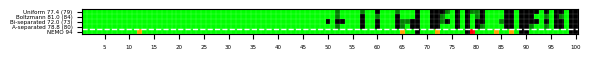

In [23]:
methods = ['uniform', 'bpenergy', 'linearbp', 'linearbp_onlyA']

data = np.array([results[x] for x in methods] + [nemo])


plt.imshow(data, interpolation="nearest", cmap=cmap, norm=norm)

# Add separator
plt.hlines(len(methods)-0.5,-0.5,99.5,  colors='w', linestyles='dashed', linewidth=1)


plt.xticks(range(4,100,5), range(5,101,5))
plt.yticks(range(len(methods)+1), ['Uniform 77.4 (79)', 'Boltzmann 81.0 (84)', 'Bi-separated 72.0 (73)', 'A-separated 78.8 (80)', 'NEMO 94'])
plt.tick_params('both', labelsize = 4)

# Add grid
ax = plt.gca()
ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=0.1)
ax.tick_params(which="minor", bottom=False, left=False)
plt.savefig('../img/eterna100_result.pdf', bbox_inches='tight', dpi=200)

# Detail plot with NEMO + separable seed

In [20]:
# Load results of NEMO + separable seed
dfNemoExt = pd.read_csv('../results/eterna_results/nemo_separable_eterna_summary.csv', sep='\t', index_col=False)

resultsNemoExt = {x: [0]*100 for x in ['linearbp', 'linearbp_onlyA']}
for x in ['linearbp', 'linearbp_onlyA']:
    for i in dfNemoExt.loc[dfNemoExt['method']==x, 'puzzle']:
        resultsNemoExt[x][int(i)-1] = 1
for x in ['linearbp', 'linearbp_onlyA']:
    print(f'# solved puzzles using NEMO with {x}: {sum(resultsNemoExt[x])}')

# solved puzzles using NEMO with linearbp: 88
# solved puzzles using NEMO with linearbp_onlyA: 90


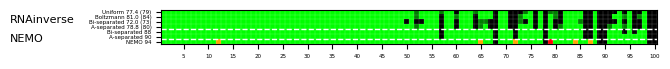

In [24]:
methods = ['uniform', 'bpenergy', 'linearbp', 'linearbp_onlyA']

data = np.array([results[x] for x in methods] + [resultsNemoExt['linearbp'], resultsNemoExt['linearbp_onlyA'], nemo])


plt.imshow(data, interpolation="nearest", cmap=cmap, norm=norm)

# Add separator
plt.hlines(len(methods)-0.5,-0.5,99.5,  colors='w', linestyles='dashed', linewidth=1)
plt.hlines(len(methods)+2-0.5,-0.5,99.5,  colors='w', linestyles='dashed', linewidth=1)


plt.xticks(range(4,100,5), range(5,101,5))
plt.yticks(range(len(methods)+3), ['Uniform 77.4 (79)', 'Boltzmann 81.0 (84)', 'Bi-separated 72.0 (73)', 'A-separated 78.8 (80)', 'Bi-separated 88', 'A-separated 90', 'NEMO 94'])
plt.tick_params('both', labelsize = 4)

plt.text(-31, 2.2, 'RNAinverse', fontsize=8)
plt.text(-31, 6, 'NEMO', fontsize=8)

# Add grid
ax = plt.gca()
ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=0.1)
ax.tick_params(which="minor", bottom=False, left=False)
plt.savefig('../img/eterna100_ext_result.pdf', bbox_inches='tight', dpi=200)